In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/deep learning /Churn_Modelling.csv")

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/deep learning /Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#Structure of Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#Content of variable

In [ ]:
# take a look in variables (object and integer ones )
# we didnt see float ones cuz if they had any caracter that will apear in infos

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
# we drop the useless variables

In [ ]:
df.drop("RowNumber",inplace=True,axis=1)

In [ ]:
df.drop("CustomerId",inplace=True,axis=1)

In [ ]:
df.drop("Surname",inplace=True,axis=1)

# Analyse Univarie

## Categorial variable

In [ ]:
df.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# we start by the depandent variable (Exited)

In [ ]:
value_count_series = df['Exited'].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({'Exited': value_counts_series.index,'Count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['Count']/(7963+2037)
#display the DataFrame
print(df_value_counts)


   Exited  Count  percentage
0       0   7963      0.7963
1       1   2037      0.2037


Text(0.5, 1.0, 'age groups counts')

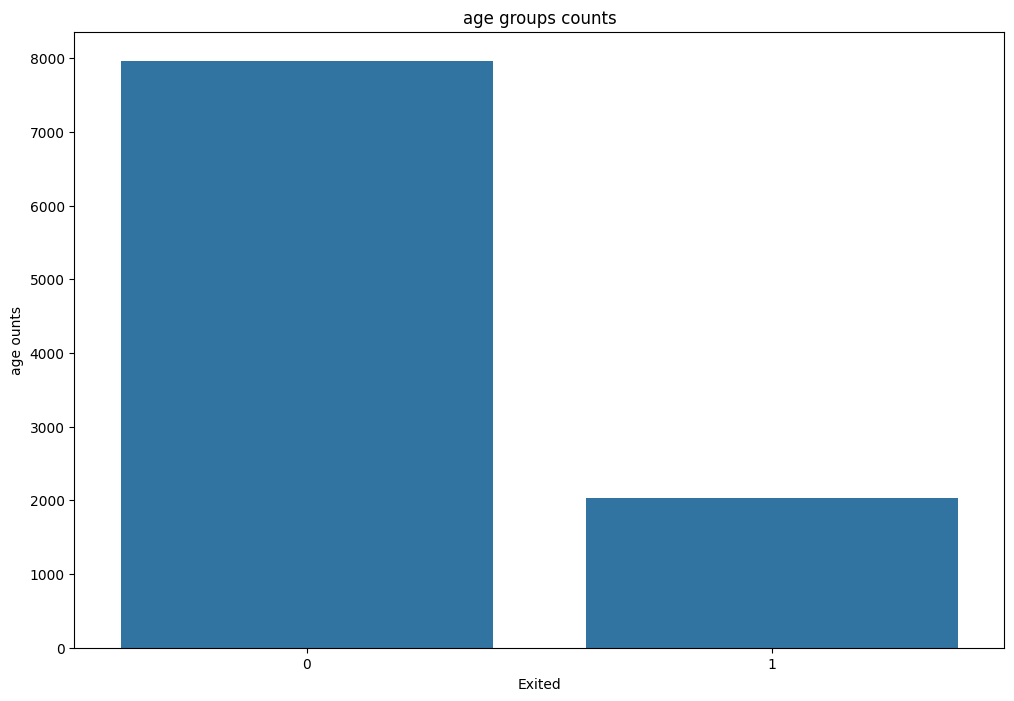

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_value_counts['Exited'] , y=df_value_counts['Count'])
plt.xlabel("Exited")
plt.ylabel("age ounts")
plt.title("age groups counts")

In [ ]:
value_count_series= df['Geography'].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({'Geography': value_counts_series.index,'Count' : value_counts_series.values})
df_value_counts['percentage'] = df_value_counts['Count']/(7963+2037)
#display the DataFrame
print(df_value_counts)

  Geography  Count  percentage
0    France   5014      0.5014
1   Germany   2509      0.2509
2     Spain   2477      0.2477


<ipython-input-40-885f025c3df3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_value_counts['Geography'] , y=df_value_counts['Count'],palette='viridis')


Text(0.5, 1.0, 'counts')

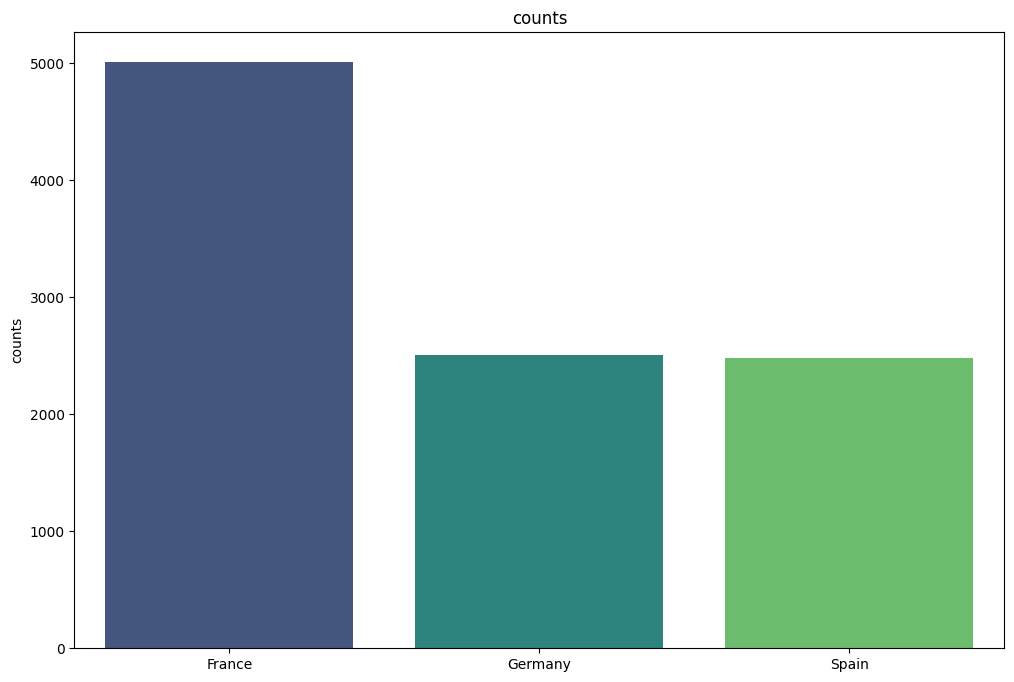

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_value_counts['Geography'] , y=df_value_counts['Count'],palette='viridis')
plt.xlabel("")
plt.ylabel("counts")
plt.title("counts")

In [ ]:
value_count_series = df['Gender'].value_counts()
# convert the series to DataFrame :
df_value_counts = pd.DataFrame({'Gender': value_counts_series.index,'Count' : value_counts_series.values})
#df_value_counts['percentage'] = df_value_counts['Count']/(7963+2037)
#display the DataFrame
print(df_value_counts)

   Gender  Count
0    Male   5457
1  Female   4543


<ipython-input-53-b1975510a568>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_value_counts['Gender'] , y=df_value_counts['Count'],palette='viridis')


Text(0.5, 1.0, 'counts')

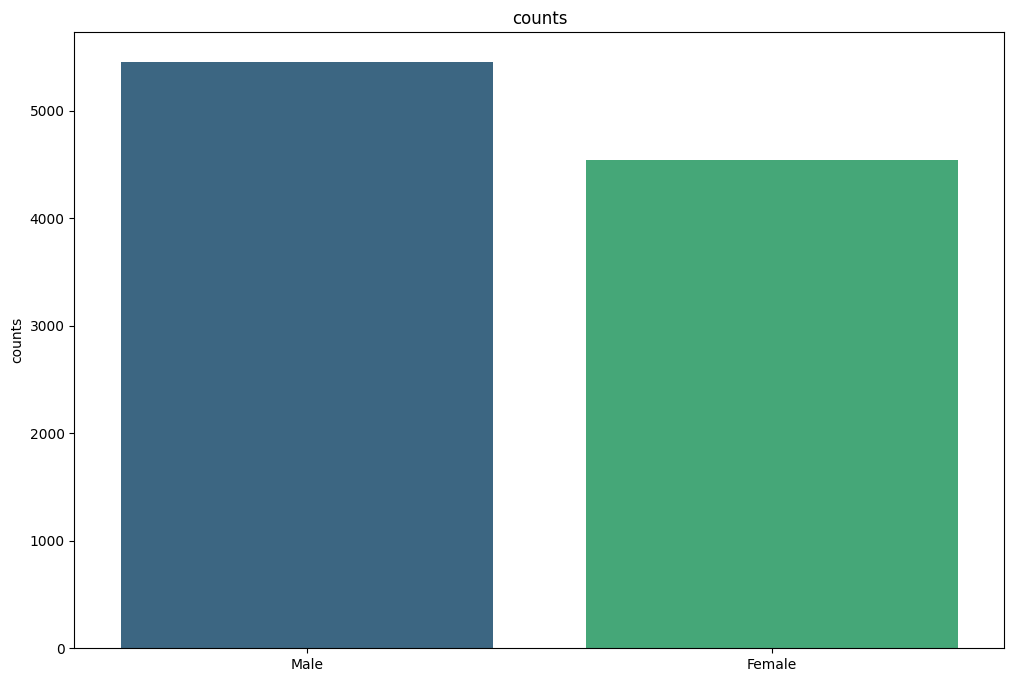

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_value_counts['Gender'] , y=df_value_counts['Count'],palette='viridis')
plt.xlabel("")
plt.ylabel("counts")
plt.title("counts")

## Numerical variable

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


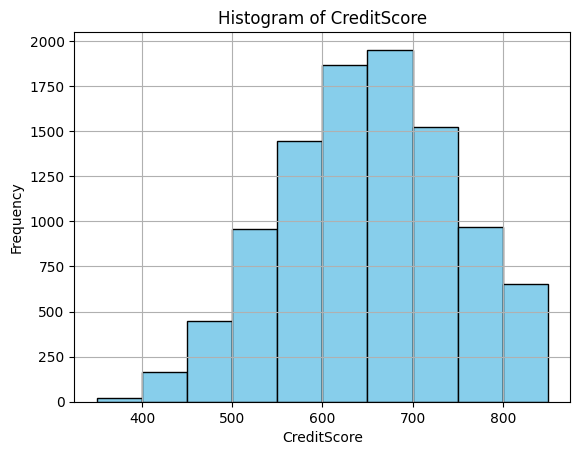

In [ ]:
# Assuming df is your DataFrame and you want to plot a histogram for the 'Exited' column
plt.hist(df['CreditScore'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.title('Histogram of CreditScore')
plt.grid(True)

plt.show()

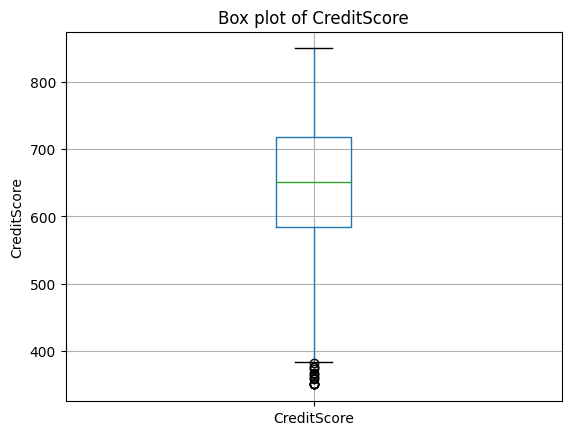

In [ ]:
#to show outlayers :
df.boxplot(column='CreditScore')

plt.title('Box plot of CreditScore')
plt.ylabel('CreditScore')

plt.show()

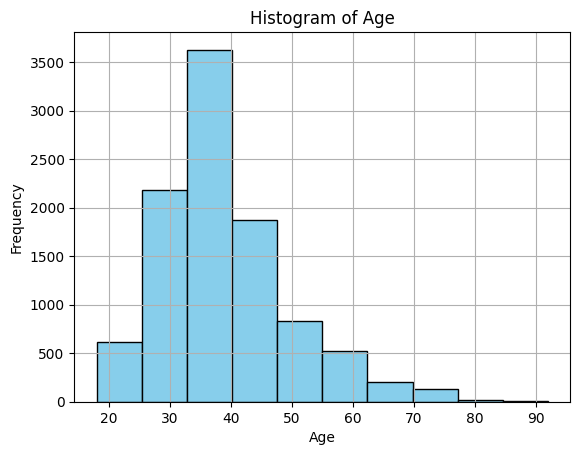

In [ ]:
# Drop rows with NaN values in 'combined' column
df = df.dropna(subset=['combined'])

# Plot histogram
plt.hist(df['combined'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Combined')
plt.ylabel('Frequency')
plt.title('Histogram of Combined')
plt.grid(True)
plt.show()

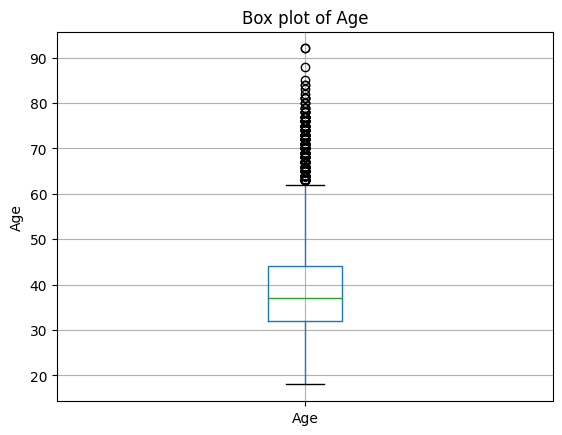

In [ ]:
df.boxplot(column='Age')

plt.title('Box plot of Age')
plt.ylabel('Age')

plt.show()

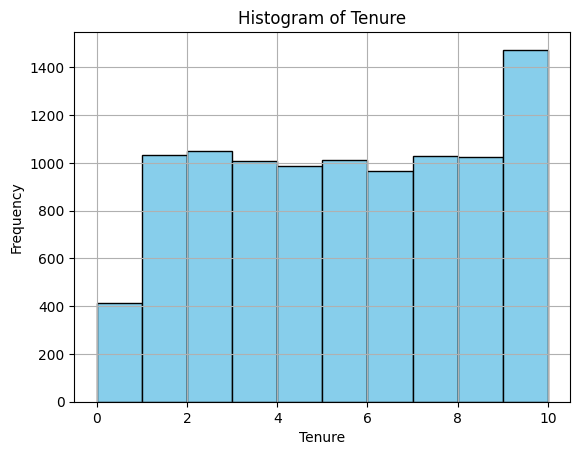

In [ ]:
plt.hist(df['Tenure'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')
plt.grid(True)

plt.show()

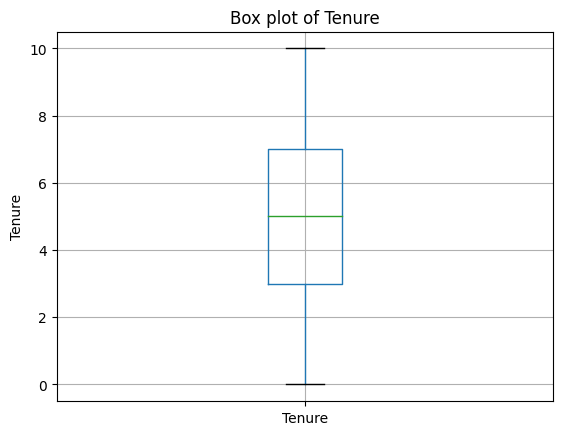

In [ ]:
df.boxplot(column='Tenure')

plt.title('Box plot of Tenure')
plt.ylabel('Tenure')

plt.show()

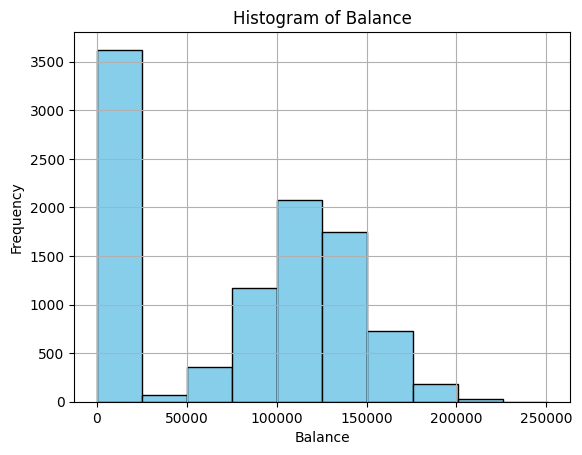

In [ ]:
plt.hist(df['Balance'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')
plt.grid(True)

plt.show()

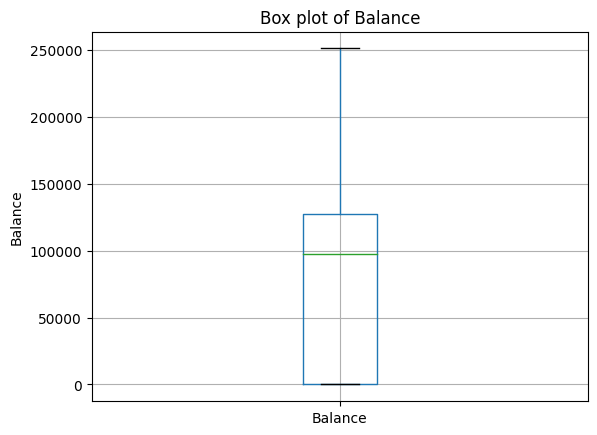

In [ ]:
df.boxplot(column='Balance')

plt.title('Box plot of Balance')
plt.ylabel('Balance')

plt.show()

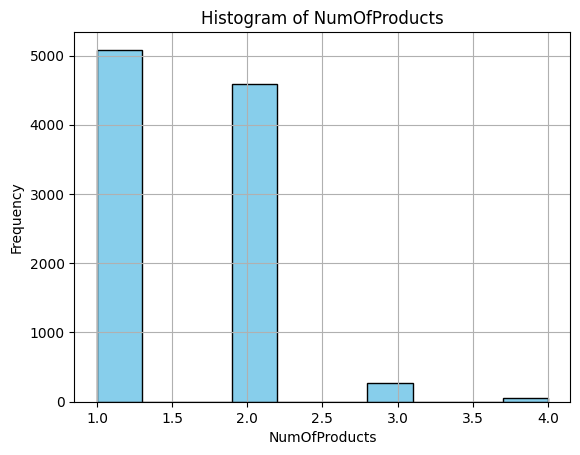

In [ ]:
plt.hist(df['NumOfProducts'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('NumOfProducts')
plt.ylabel('Frequency')
plt.title('Histogram of NumOfProducts')
plt.grid(True)

plt.show()

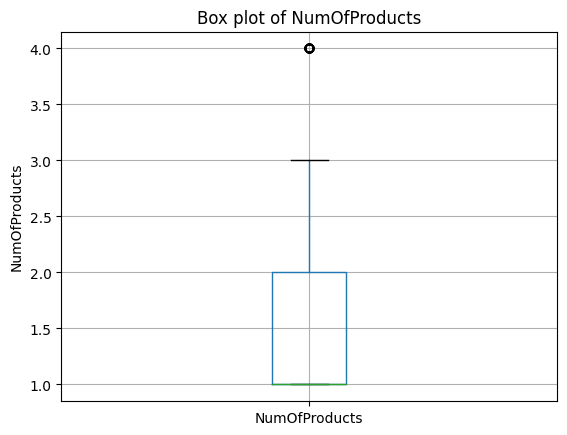

In [ ]:
df.boxplot(column='NumOfProducts')

plt.title('Box plot of NumOfProducts')
plt.ylabel('NumOfProducts')

plt.show()

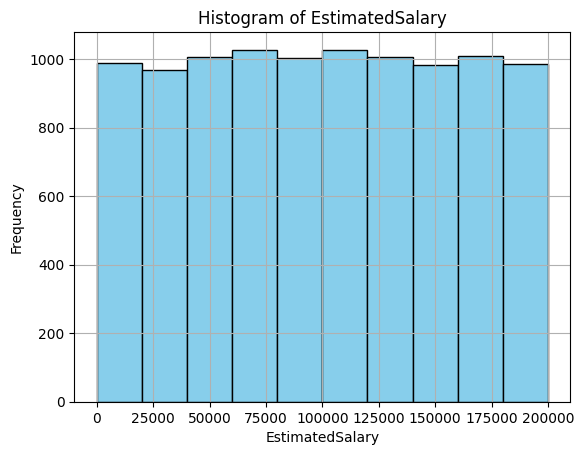

In [ ]:
plt.hist(df['EstimatedSalary'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('EstimatedSalary')
plt.ylabel('Frequency')
plt.title('Histogram of EstimatedSalary')
plt.grid(True)

plt.show()

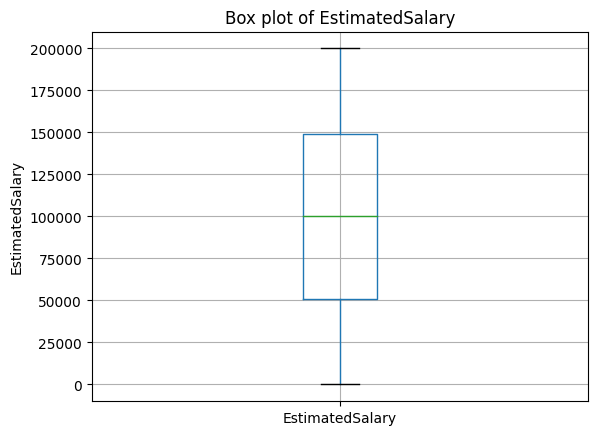

In [ ]:
df.boxplot(column='EstimatedSalary')

plt.title('Box plot of EstimatedSalary')
plt.ylabel('EstimatedSalary')

plt.show()

##Analyse Multyvarie

###Categorial


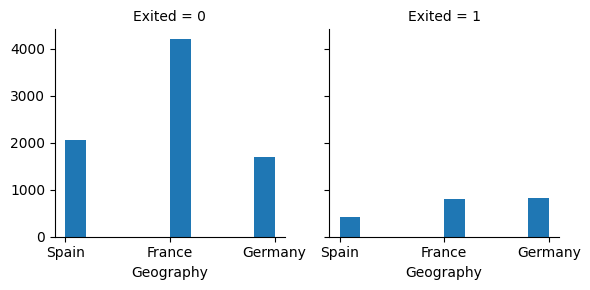

In [ ]:
country=sns.FacetGrid(df,col='Exited')
country.map(plt.hist,'Geography')

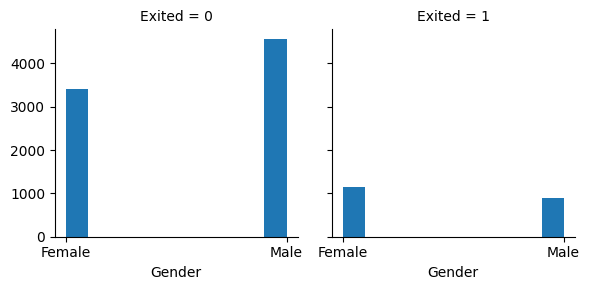

In [ ]:
country=sns.FacetGrid(df,col='Exited')
country.map(plt.hist,'Gender')

###Numerical

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


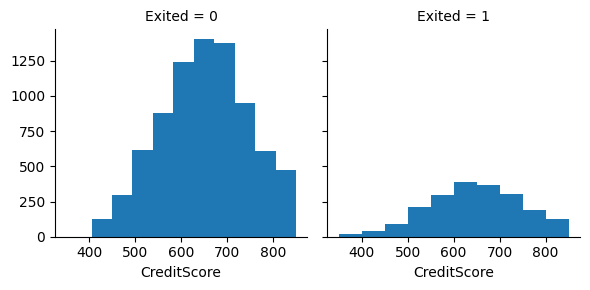

In [ ]:
country=sns.FacetGrid(df,col='Exited')
country.map(plt.hist,'CreditScore')

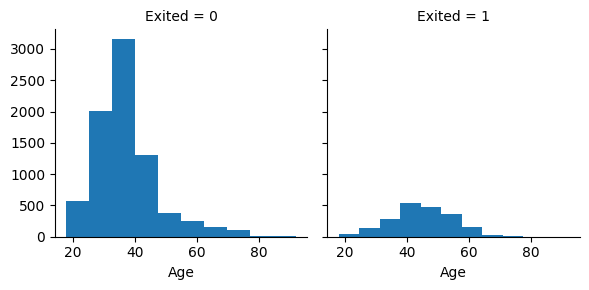

In [ ]:
country=sns.FacetGrid(df,col='Exited')
country.map(plt.hist,'Age')

In [ ]:
country=sns.FacetGrid(df,col='Exited')
country.map(plt.hist,'Tenure')

NameError: name 'sns' is not defined

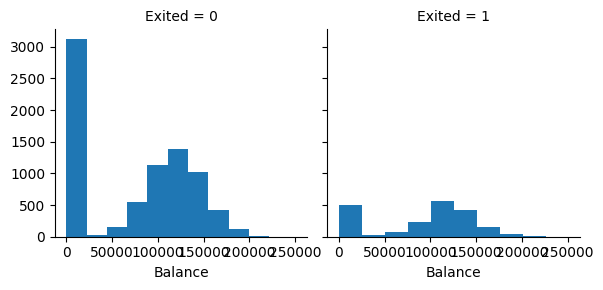

In [ ]:
country=sns.FacetGrid(df,col='Exited')
country.map(plt.hist,'Balance')

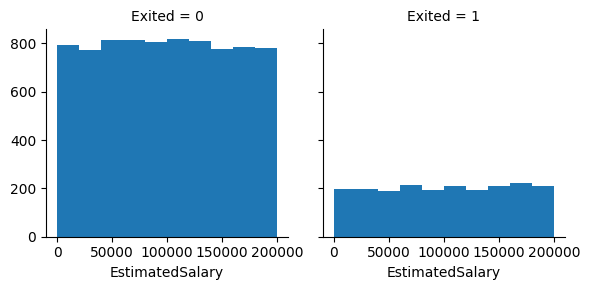

In [ ]:
country=sns.FacetGrid(df,col='Exited')
country.map(plt.hist,'EstimatedSalary')

#Missing Values

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# we dont have missing values >>>>> no imputation applied there
#decision replace with mean in numerical variable / mode / resonable value

# NOW,we have to switch every object to a numerical var without using one hot encoding (no order needed)

In [ ]:
df['Gender']= df["Gender"].replace({"Male":1, "Female":0})

In [ ]:
df.drop('Geography',inplace=True ,axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


#MODILISATION


In [ ]:
# we have all features is x
# target variable is y

In [ ]:
x= df.drop('Exited', axis=1)
y= df[['Exited']]

In [ ]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,42,2,0.00,1,1,1,101348.88
1,608,0,41,1,83807.86,1,0,1,112542.58
2,502,0,42,8,159660.80,3,1,0,113931.57
3,699,0,39,1,0.00,2,0,0,93826.63
4,850,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64
9996,516,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,36,7,0.00,1,0,1,42085.58
9998,772,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


##Scalar

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# we can use even minmax /normalization/log.......

In [ ]:
scalar=MinMaxScaler()

In [ ]:
X=scalar.fit_transform(x)
X

array([[0.538     , 0.        , 0.32432432, ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 0.        , 0.31081081, ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.32432432, ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.24324324, ..., 0.        , 1.        ,
        0.21039009],
       [0.844     , 1.        , 0.32432432, ..., 1.        , 0.        ,
        0.46442905],
       [0.884     , 0.        , 0.13513514, ..., 1.        , 0.        ,
        0.19091423]])

In [ ]:
Y=scalar.fit_transform(y)
Y

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

#Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#Model

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(10,activation= "relu",input_dim=9))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(1,activation= "sigmoid"))

model.compile(optimizer= "adam",loss="binary_crossentropy", metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                100       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 1)                 1

#Fit

In [ ]:
history = model.fit(X_train,y_train,epochs=500,validation_split=0.2)

Epoch 1/500
200/200 [==============================] - 9s 10ms/step - loss: 0.5486 - accuracy: 0.7927 - val_loss: 0.5052 - val_accuracy: 0.7969
Epoch 2/500
200/200 [==============================] - 1s 7ms/step - loss: 0.5066 - accuracy: 0.7958 - val_loss: 0.5054 - val_accuracy: 0.7969
Epoch 3/500
200/200 [==============================] - 1s 6ms/step - loss: 0.5064 - accuracy: 0.7958 - val_loss: 0.5048 - val_accuracy: 0.7969
Epoch 4/500
200/200 [==============================] - 1s 6ms/step - loss: 0.5068 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 5/500
200/200 [==============================] - 1s 6ms/step - loss: 0.5072 - accuracy: 0.7958 - val_loss: 0.5057 - val_accuracy: 0.7969
Epoch 6/500
200/200 [==============================] - 1s 7ms/step - loss: 0.5066 - accuracy: 0.7958 - val_loss: 0.5049 - val_accuracy: 0.7969
Epoch 7/500
200/200 [==============================] - 1s 6ms/step - loss: 0.5065 - accuracy: 0.7958 - val_loss: 0.5056 - val_accuracy: 0.796

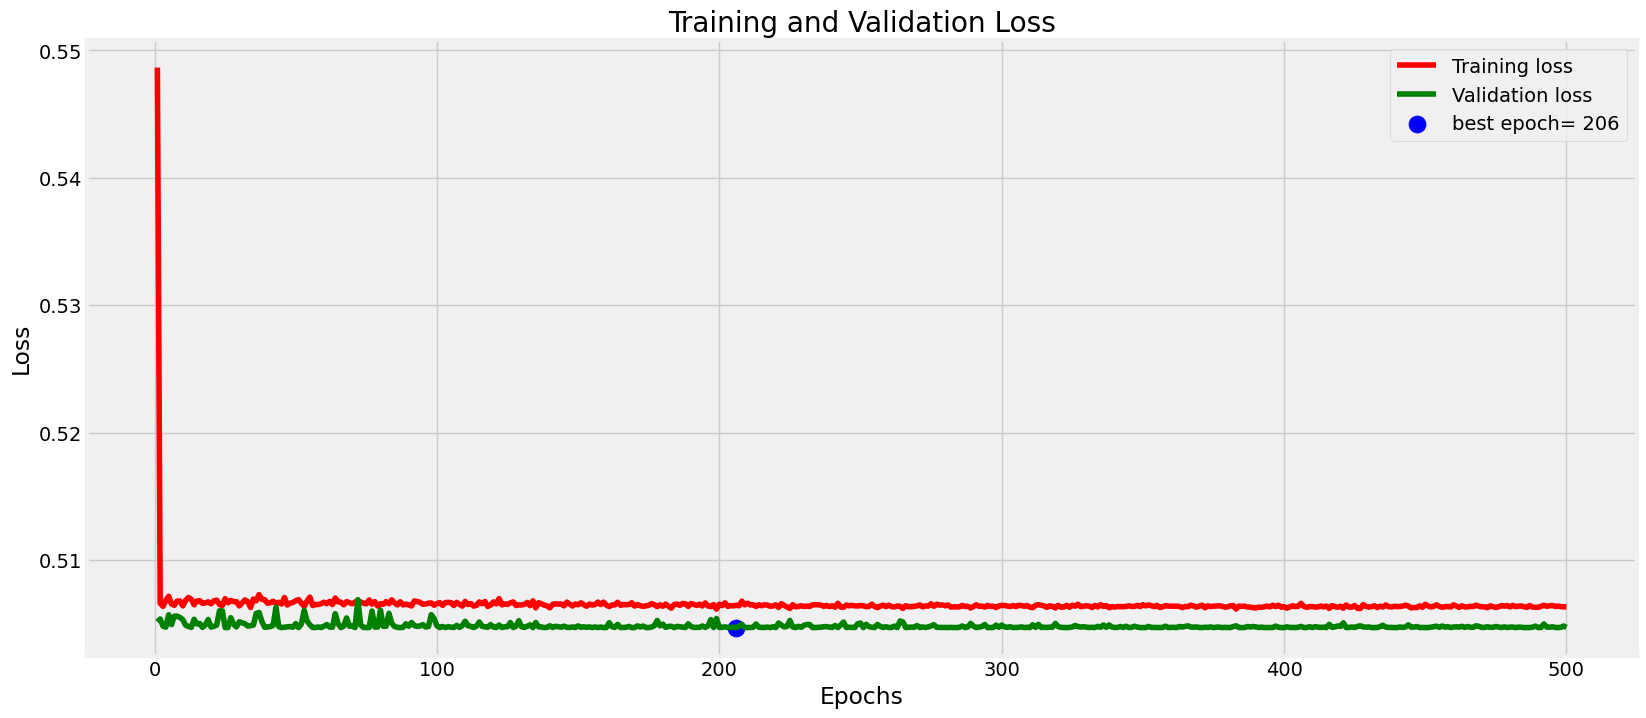

In [ ]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [ ]:
df['booking_type'] = df['market_segment'] + '-' + df['distribution_channel']
df.drop(columns=['market_segment', 'distribution_channel'], inplace=True)